# Summary

In [1]:
# In this not book Data Preprocessing is done for Text and Categorical Coulmns.
# Data Is Converted into vectors

## Import Statements

In [2]:
import pandas as pd 
import numpy as np
import os
import glob   
import gc
import time 
from collections import Counter
import seaborn as sns 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
#https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef766
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from tqdm import tqdm, tqdm_pandas
from bs4 import BeautifulSoup
#Plotly Tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
from plotly import tools
import plotly.tools as tls
init_notebook_mode(connected=True)
#https://stackoverflow.com/questions/55132071/series-object-has-no-attribute-iplot/55132247
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from sklearn.preprocessing import MinMaxScaler

from plotly.offline import iplot
import plotly.graph_objs as go
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pickle

## Global Variables

In [3]:
_PickleFilesFolder="pickle_files"
_PickleFile_Merged_Listing_NY="Merged_Listing_NY"

_PickleFile_Vectorized_Data="NY_Vectors"
global _DF_vector_train
_DF_vector_train=pd.DataFrame()
global _DF_vector_test
_DF_vector_test=pd.DataFrame()
scaler = MinMaxScaler()

In [4]:
stepcount="4"

In [5]:
_DF_LISTING_EDA= pd.read_pickle(_PickleFilesFolder + "/" + _PickleFile_Merged_Listing_NY + "_" + stepcount)

In [6]:
#preparing dataset for +ve and -ve classes
y= _DF_LISTING_EDA['price'].values
X= _DF_LISTING_EDA.drop(['price'],axis=1)
#print (y)


In [7]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3,random_state=85)


In [8]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (25830, 159)
Number of data points in test data : (11070, 159)


<h1>1. Encoding categorical features: </h1>

>neighbourhood

>neighbourhood_cleansed

>neighbourhood_group_cleansed

>property_type

>room_type

>bathrooms_text

>host_response_time

>host_neighbourhoodd


In [9]:
def get_One_Hot_Encodings(colname):
    vectorizer = CountVectorizer(lowercase='false')
    vectorizer.fit(X_train[colname].values) # fit has to happen only on train data
    # we use the fitted CountVectorizer to convert the text to vector
    train_ohe = vectorizer.transform(X_train[colname].values)
    test_ohe=vectorizer.transform(X_test[colname].values)

    print("After vectorizations")
    print(train_ohe.shape, y_train.shape)

    print(test_ohe.shape, y_test.shape)
    print(vectorizer.get_feature_names())
    print("="*100)
     
    return train_ohe,test_ohe

In [10]:
#https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63
from sklearn.feature_extraction import FeatureHasher
def get_featureHasherEncoding(featuresCount,colname):
    fh = FeatureHasher(n_features=featuresCount, input_type='string')
    hashed_features_vec = fh.fit(X_train[colname].values)
    train_ohe = hashed_features_vec.transform(X_train[colname].values)
    test_ohe=hashed_features_vec.transform(X_test[colname].values)
    print("After vectorizations")
    print(train_ohe.shape, y_train.shape)
    
    print(test_ohe.shape, y_test.shape)

    print("="*100)
    
    return train_ohe,test_ohe

<h2>1.1 Encoding categorical features:  Neighbourhood </h2>

In [11]:
X_train['neighbourhood'].nunique()

143

In [12]:
X_train_neighbourhood_ohe,X_test_neighbourhood_ohe = get_featureHasherEncoding(15,'neighbourhood')
_DF_vector_train=pd.DataFrame(X_train_neighbourhood_ohe.todense(),index=X_train.index).add_suffix('neighbourhood_vect')
_DF_vector_test=pd.DataFrame(X_test_neighbourhood_ohe.todense(),index=X_test.index).add_suffix('neighbourhood_vect')

After vectorizations
(25830, 15) (25830,)
(11070, 15) (11070,)


In [13]:
X_train_neighbourhood_ohe.toarray().shape


(25830, 15)

In [14]:
print('_DF_vector_train.shape')
print(_DF_vector_train.shape)
print('_DF_vector_test.shape')
print(_DF_vector_test.shape)

_DF_vector_train.shape
(25830, 15)
_DF_vector_test.shape
(11070, 15)


<h2>1.2 Encoding categorical features:  neighbourhood_cleansed </h2>

In [15]:
X_train['neighbourhood_cleansed'].nunique()

217

In [16]:
X_train_neighbourhood_cleansed_ohe,X_test_neighbourhood_cleansed_ohe = get_featureHasherEncoding(20,'neighbourhood_cleansed')

After vectorizations
(25830, 20) (25830,)
(11070, 20) (11070,)


In [17]:
df=pd.DataFrame(X_train_neighbourhood_cleansed_ohe.todense(), index=X_train.index).add_suffix('neighbourhood_clean_vect')
_DF_vector_train  = _DF_vector_train.merge(df,left_index=True, right_index=True)
df=pd.DataFrame(X_test_neighbourhood_cleansed_ohe.todense(), index=X_test.index).add_suffix('neighbourhood_clean_vect')
_DF_vector_test  = _DF_vector_test.merge(df,left_index=True, right_index=True)
print('_DF_vector_train.shape')
print(_DF_vector_train.shape)
print('_DF_vector_test.shape')
print(_DF_vector_test.shape)

_DF_vector_train.shape
(25830, 35)
_DF_vector_test.shape
(11070, 35)


<h2>1.3 Encoding categorical features:  neighbourhood_group_cleansed </h2>

In [18]:
X_train['neighbourhood_group_cleansed'].nunique()

5

In [19]:
X_train_neighbourhood_group_cleansed_ohe,X_test_neighbourhood_group_cleansed_ohe =  get_featureHasherEncoding(2,'neighbourhood_group_cleansed')

After vectorizations
(25830, 2) (25830,)
(11070, 2) (11070,)


In [20]:
df=pd.DataFrame(X_train_neighbourhood_group_cleansed_ohe.todense(), index=X_train.index).add_suffix('neighbourhood_group_vect')
_DF_vector_train  = _DF_vector_train.merge(df,left_index=True, right_index=True)
df=pd.DataFrame(X_test_neighbourhood_group_cleansed_ohe.todense(), index=X_test.index).add_suffix('neighbourhood_group_vect')
_DF_vector_test  = _DF_vector_test.merge(df,left_index=True, right_index=True)
print('_DF_vector_train.shape')
print(_DF_vector_train.shape)
print('_DF_vector_test.shape')
print(_DF_vector_test.shape)

_DF_vector_train.shape
(25830, 37)
_DF_vector_test.shape
(11070, 37)


# <h2>1.4 Encoding categorical features:  property_type </h2>

In [21]:
X_train.property_type.nunique()

73

In [22]:
X_train_property_type_ohe,X_test_property_type_ohe =get_featureHasherEncoding(10,'property_type') 

After vectorizations
(25830, 10) (25830,)
(11070, 10) (11070,)


In [23]:
df=pd.DataFrame(X_train_property_type_ohe.todense(), index=X_train.index).add_suffix('property_vect')
_DF_vector_train  = _DF_vector_train.merge(df,left_index=True, right_index=True)
df=pd.DataFrame(X_test_property_type_ohe.todense(), index=X_test.index).add_suffix('property_vect')
_DF_vector_test  = _DF_vector_test.merge(df,left_index=True, right_index=True)
print('_DF_vector_train.shape')
print(_DF_vector_train.shape)
print('_DF_vector_test.shape')
print(_DF_vector_test.shape)

_DF_vector_train.shape
(25830, 47)
_DF_vector_test.shape
(11070, 47)


# <h2>1.5 Encoding categorical features:  **room_type** </h2>

In [24]:
X_train.room_type.nunique()

4

In [25]:
X_train_room_type_ohe,X_test_room_type_ohe = get_featureHasherEncoding(2,'room_type') 

After vectorizations
(25830, 2) (25830,)
(11070, 2) (11070,)


In [26]:
df=pd.DataFrame(X_train_room_type_ohe.todense(), index=X_train.index).add_suffix('room_type_vect')
_DF_vector_train  = _DF_vector_train.merge(df,left_index=True, right_index=True)
df=pd.DataFrame(X_test_room_type_ohe.todense(), index=X_test.index).add_suffix('room_type_vect')
_DF_vector_test  = _DF_vector_test.merge(df,left_index=True, right_index=True)
print('_DF_vector_train.shape')
print(_DF_vector_train.shape)
print('_DF_vector_test.shape')
print(_DF_vector_test.shape)

_DF_vector_train.shape
(25830, 49)
_DF_vector_test.shape
(11070, 49)


# <h2>1.6 Encoding categorical features:  **bathrooms_text** </h2>

In [27]:
X_train.bathrooms_text.nunique()

17

In [28]:
X_train.bathrooms_text.unique()

array(['1', '2', '1.5', '2.5', '3', '0', '4', '3.5', '0.5', '7', '4.5',
       '6', '5', '5.5', '8', '6.5', '7.5'], dtype=object)

<h2>1.6 Encoding categorical features:  **host_response_time** </h2>

In [29]:
X_train.host_response_time.unique()


array(['3', '4', '2', '0', '1'], dtype=object)

In [30]:
X_train['host_response_time'].unique()

array(['3', '4', '2', '0', '1'], dtype=object)

<h1> TFIDF Text Features<h1>

<h2>Description</h2>

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=500,ngram_range=(3,3) )
vectorizer.fit(X_train['description'].values)
X_train_description_tfidf = vectorizer.transform(X_train['description'])
X_test_description_tfidf = vectorizer.transform(X_test['description'])
print("After vectorizations")
print(X_train_description_tfidf.shape, y_train.shape)
print(X_test_description_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(25830, 500) (25830,)
(11070, 500) (11070,)


In [32]:
df=pd.DataFrame(X_train_description_tfidf.todense(), index=X_train.index).add_suffix('description_vect')
_DF_vector_train  = _DF_vector_train.merge(df,left_index=True, right_index=True)
df=pd.DataFrame(X_test_description_tfidf.todense(), index=X_test.index).add_suffix('description_vect')
_DF_vector_test  = _DF_vector_test.merge(df,left_index=True, right_index=True)
print('_DF_vector_train.shape')
print(_DF_vector_train.shape)
print('_DF_vector_test.shape')
print(_DF_vector_test.shape)

_DF_vector_train.shape
(25830, 549)
_DF_vector_test.shape
(11070, 549)


In [33]:
_DF_vector_train.to_pickle(_PickleFilesFolder + "/" + _PickleFile_Vectorized_Data + "_Final_Features_train")

In [34]:
_DF_vector_test.to_pickle(_PickleFilesFolder + "/" + _PickleFile_Vectorized_Data + "_Final_Features_test")

In [35]:
X_train.drop(['description','neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed','property_type','room_type'], axis=1, inplace=True)

In [36]:
X_test.drop(['description','neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed','property_type','room_type'], axis=1, inplace=True)

In [37]:
cols = list(X_train.columns)
for i in cols:
    X_train[i] = X_train[i].apply(pd.to_numeric)
    #print(i)

In [38]:
cols = list(X_test.columns)
for i in cols:
    X_test[i] = X_test[i].apply(pd.to_numeric)
    #print(i)

In [39]:
X_test.isnull().sum()
X_test['host_age'].fillna(X_test['host_age'].mean(), inplace = True)
X_test['host_has_profile_pic'].fillna(X_test['host_has_profile_pic'].mean(), inplace = True)
X_test.isnull().sum()

host_response_time      0
host_response_rate      0
host_acceptance_rate    0
host_is_superhost       0
host_listings_count     0
                       ..
wifi                    0
kitchen                 0
dedicatedworkspace      0
gym                     0
bathtub                 0
Length: 153, dtype: int64

In [40]:
X_train['host_has_profile_pic'].fillna(X_train['host_has_profile_pic'].mean(), inplace = True)
X_train['host_age'].fillna(X_train['host_age'].mean(), inplace = True)


In [41]:

X_train.to_pickle(_PickleFilesFolder + "/" + _PickleFile_Merged_Listing_NY + "_Final_Features_" + "train_raw")

X_test.to_pickle(_PickleFilesFolder + "/" + _PickleFile_Merged_Listing_NY + "_Final_Features" + "test_raw")

In [42]:
np.save(_PickleFilesFolder + "/" + _PickleFile_Merged_Listing_NY + "_Final_Features_y_train_raw",y_train)

In [43]:
np.save(_PickleFilesFolder + "/" + _PickleFile_Merged_Listing_NY + "__Final_Features_y_test_raw",y_test)

# Feature Selection For Numerical Data

# Correlation feature selection

In [44]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [45]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

107

In [46]:
corr_features

{'apr_avg_maximum_nights',
 'apr_avg_minimum_nights',
 'apr_avg_price',
 'aug_avg_adjusted_price',
 'aug_avg_maximum_nights',
 'aug_avg_minimum_nights',
 'aug_avg_price',
 'availability_60',
 'availability_90',
 'avg_review_score',
 'dec_avg_adjusted_price',
 'dec_avg_maximum_nights',
 'dec_avg_minimum_nights',
 'dec_avg_price',
 'feb_avg_adjusted_price',
 'feb_avg_availablilty_rate',
 'feb_avg_maximum_nights',
 'feb_avg_minimum_nights',
 'feb_avg_price',
 'fri_avg_adjusted_price',
 'fri_avg_availablilty_rate',
 'fri_avg_maximum_nights',
 'fri_avg_minimum_nights',
 'fri_avg_price',
 'host_response_rate',
 'host_total_listings_count',
 'jan_avg_adjusted_price',
 'jan_avg_availablilty_rate',
 'jan_avg_maximum_nights',
 'jan_avg_minimum_nights',
 'jan_avg_price',
 'jul_avg_adjusted_price',
 'jul_avg_availablilty_rate',
 'jul_avg_maximum_nights',
 'jul_avg_minimum_nights',
 'jul_avg_price',
 'jun_avg_adjusted_price',
 'jun_avg_availablilty_rate',
 'jun_avg_maximum_nights',
 'jun_avg_minimu

In [47]:
X_train.drop(corr_features,axis=1, inplace=True)

In [48]:
X_test.drop(corr_features,axis=1, inplace=True)

In [49]:
X_train.shape

(25830, 46)

In [50]:
X_test.shape

(11070, 46)

# Check Data Skewness and Normalize Data 

In [51]:
#https://machinelearningmastery.com/power-transforms-with-scikit-learn/
#https://opendatascience.com/transforming-skewed-data-for-machine-learning/
#https://datamadness.github.io/Skewness_Auto_Transform
#https://github.com/datamadness/Automatic-skewness-transformation-for-Pandas-DataFrame/blob/master/skew_autotransform.py

In [52]:
df_sorted_skew_features=X_train.skew().sort_values(ascending=False).reset_index()

In [53]:
df_sorted_skew_features

index           0
0                                 maximum_nights  160.696364
1                         maximum_maximum_nights   29.795737
2    calculated_host_listings_count_shared_rooms   21.941086
3                         apr_avg_adjusted_price   20.409548
4                         minimum_minimum_nights   14.633873
5                                 minimum_nights   13.164963
6                         number_of_reviews_l30d   11.838989
7                          number_of_reviews_ltm   11.655519
8                            host_listings_count   10.130566
9                         maximum_minimum_nights    9.983376
10   calculated_host_listings_count_entire_homes    8.293469
11  calculated_host_listings_count_private_rooms    6.786611
12                calculated_host_listings_count    5.710756
13                                host_about_len    5.062999
14                             reviews_per_month    4.701853
15                                bathrooms_text    4.248980
16                             number_of_reviews    3.774208
17                                          beds    3.439026
18                                      bedrooms    2.779557
19                                       bathtub    2.711260
20                                           gym    2.513602
21                                avg_review_len    2.484277
22                                  accommodates    2.471520
23                               ReviewDate_Diff    1.821491
24                             host_is_superhost    1.579774
25                     neighborhood_overview_len    1.374569
26                              instant_bookable    0.847155
27                     aug_avg_availablilty_rate    0.674768
28                              availability_365    0.562810
29                     dec_avg_availablilty_rate    0.511826
30                               availability_30    0.470843
31                                amenties_count    0.464706
32                     apr_avg_availablilty_rate    0.319393
33                            host_response_time    0.285067
34                   neighborhood_overview_score    0.110482
35                      host_verifications_types   -0.024401
36                                      host_age   -0.077039
37                          host_acceptance_rate   -0.147366
38                             description_count   -0.570347
39                            dedicatedworkspace   -0.607077
40                          review_scores_rating   -0.934797
41                        host_identity_verified   -1.480862
42                                       kitchen   -2.843921
43                                          wifi   -5.936415
44                          host_has_profile_pic  -19.132290
45                              has_availability  -23.380329

In [54]:
cols=df_sorted_skew_features['index'].values
import warnings
warnings.filterwarnings('ignore')

In [55]:
del df_sorted_skew_features

In [56]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans_p_1 = power.fit_transform(X_train)

In [57]:
df_p1=pd.DataFrame(data_trans_p_1)

In [58]:
df_p1

0         1         2         3         4         5         6   \
0      0.913101  0.895737  2.064144  0.698029  0.053804  0.503869  0.979903   
1      1.186127  0.467636  2.064144  0.341071  0.053804  0.503869  0.480928   
2      1.186127  0.467636 -0.484462  1.222208  0.053804 -1.984645  1.987510   
3      1.186127  0.823114 -0.484462  1.710938  0.053804  0.503869 -1.641943   
4      0.546785  0.516436 -0.484462 -0.295391  0.053804  0.503869 -1.641943   
...         ...       ...       ...       ...       ...       ...       ...   
25825 -1.013676  0.941247 -0.484462 -0.295391  0.053804 -1.984645  0.979903   
25826  0.913101  0.165999 -0.484462 -1.880365  0.053804  0.503869 -0.282712   
25827  0.913101  0.627420 -0.484462  2.294671  0.053804  0.503869  0.480928   
25828  1.186127 -1.198948 -0.484462 -0.295391  0.053804 -1.984645 -1.641943   
25829 -1.013676  0.697476 -0.484462 -0.295391  0.053804  0.503869  0.979903   

             7         8         9   ...        36        37        38  \
0     -0.301554 -0.111462 -0.389486  ...  1.002129 -0.165280  0.705700   
1     -0.301554 -0.111462 -0.389486  ... -1.171362  2.345273  1.754292   
2      1.943795  2.047064  0.737865  ...  0.814309 -1.729868 -1.263932   
3     -0.301554 -0.111462 -0.389486  ... -1.171362  0.849201 -1.086558   
4      1.943795 -0.111462 -0.389486  ... -1.171362  0.849201 -1.630401   
...         ...       ...       ...  ...       ...       ...       ...   
25825 -0.301554  1.145720  0.737865  ...  1.241155 -1.200388  0.145238   
25826 -0.301554 -0.111462 -0.389486  ... -1.171362  1.350837  0.562650   
25827 -0.301554 -0.111462  0.737865  ... -1.171362  0.344037  0.737352   
25828 -0.301554 -0.111462 -0.389486  ...  1.013515 -1.200388 -0.544806   
25829 -0.301554  1.145720  0.737865  ... -1.171362  0.344037 -0.669741   

             39        40        41        42        43        44        45  
0      0.653186  0.999688  0.163934  0.316436  0.741527 -0.349312 -0.328943  
1      2.150763 -0.946359  0.163934  0.316436 -1.348569 -0.349312  3.040045  
2      1.532566  0.927958  0.163934  0.316436  0.741527  2.862768 -0.328943  
3     -1.394436  1.125348  0.163934  0.316436  0.741527 -0.349312 -0.328943  
4      0.149234  1.107386  0.163934  0.316436  0.741527 -0.349312 -0.328943  
...         ...       ...       ...       ...       ...       ...       ...  
25825  1.110664  1.017629  0.163934  0.316436  0.741527 -0.349312 -0.328943  
25826 -0.803897 -0.351878  0.163934  0.316436  0.741527 -0.349312 -0.328943  
25827  0.747979  0.766778  0.163934  0.316436  0.741527  2.862768 -0.328943  
25828 -0.182429 -0.140288  0.163934  0.316436 -1.348569 -0.349312  3.040045  
25829 -0.419139 -1.394246  0.163934  0.316436  0.741527 -0.349312 -0.328943  

[25830 rows x 46 columns]

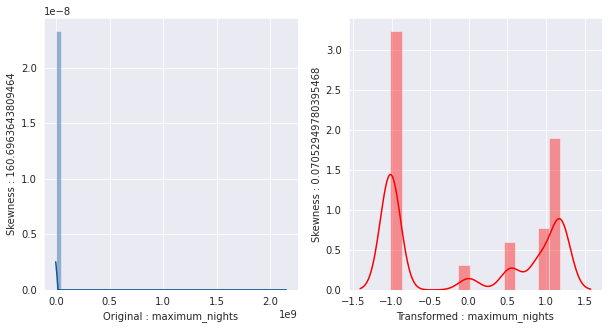

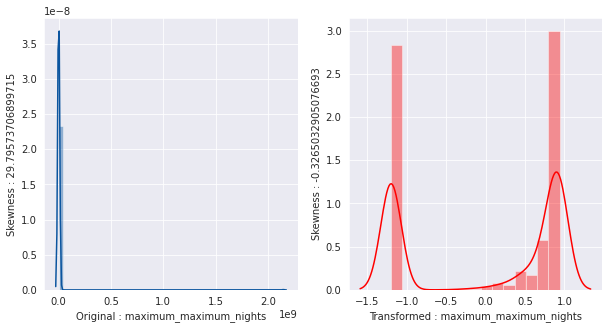

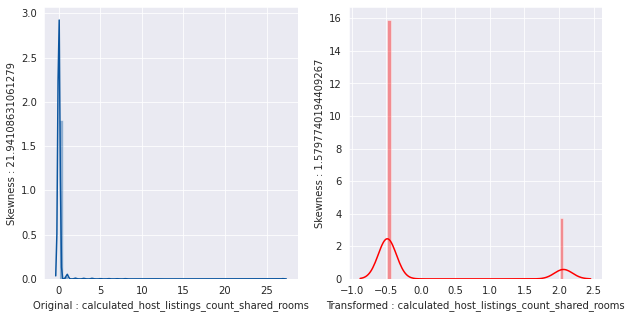

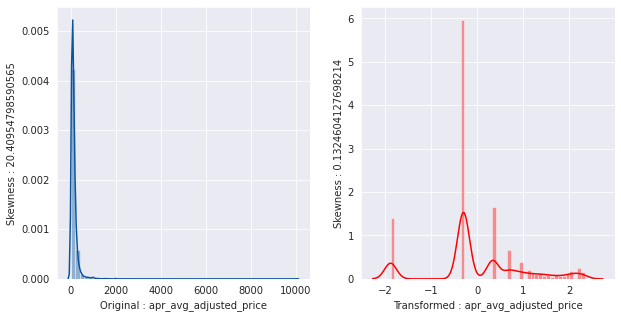

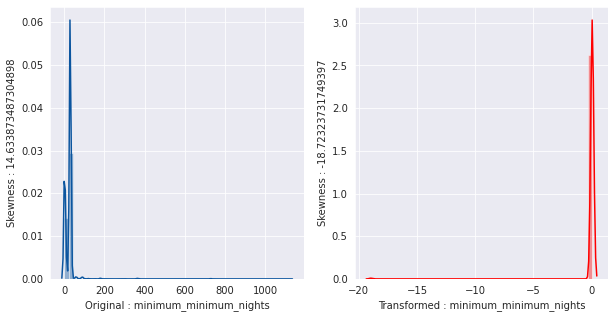

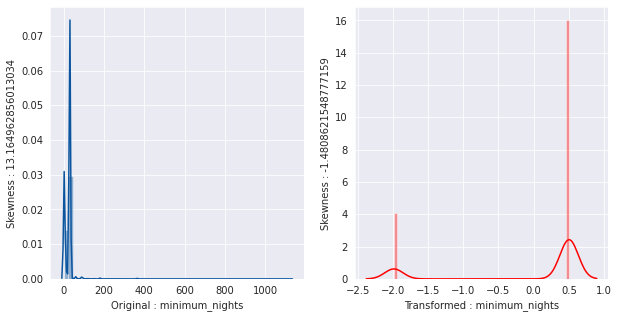

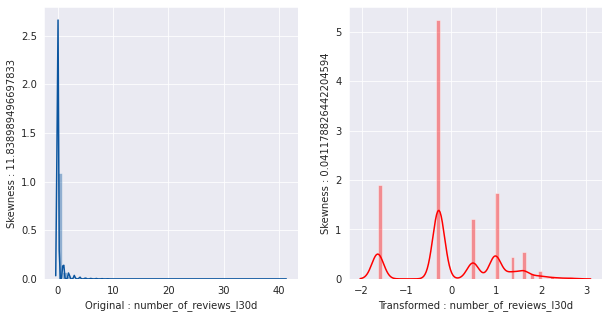

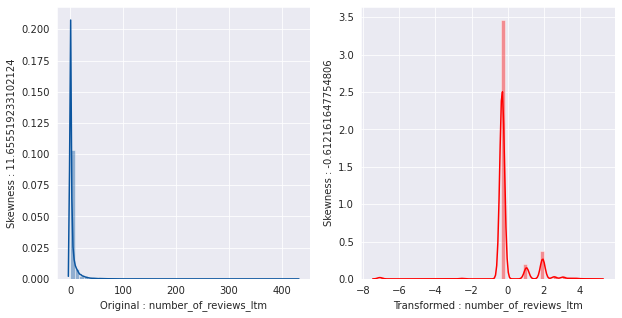

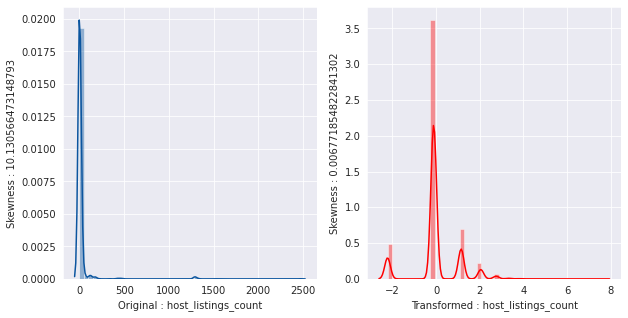

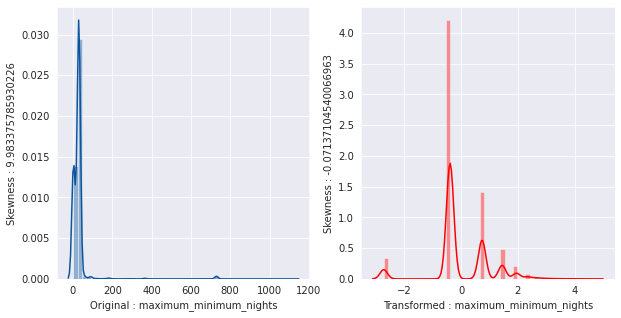

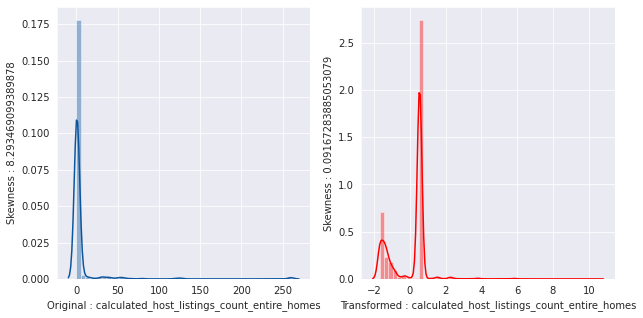

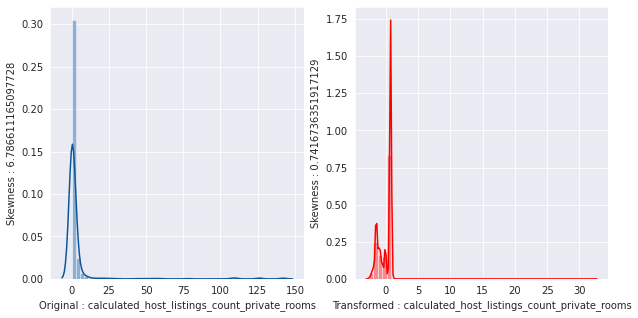

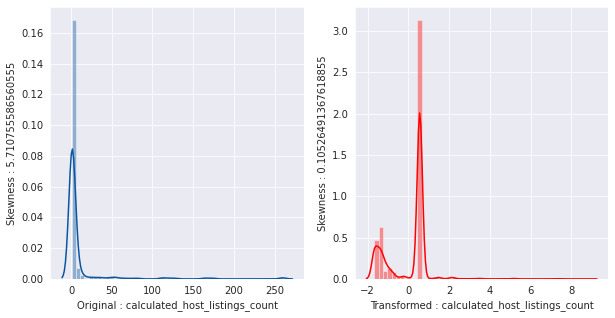

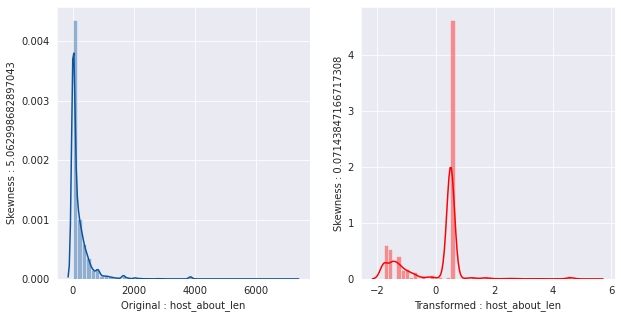

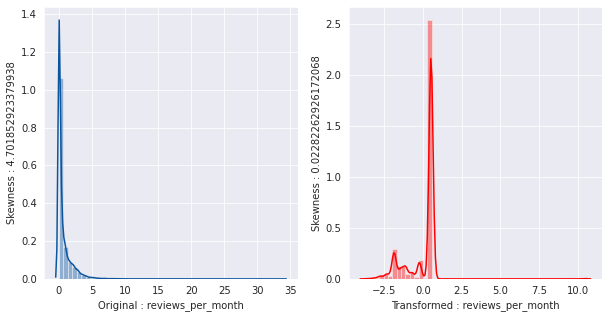

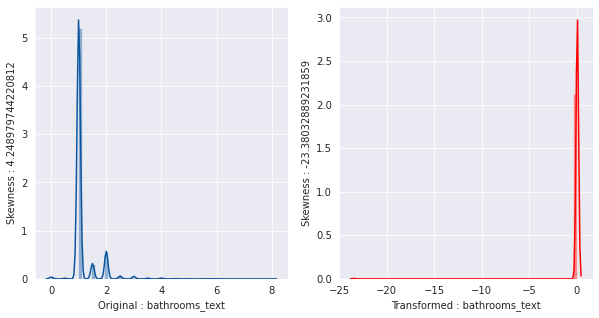

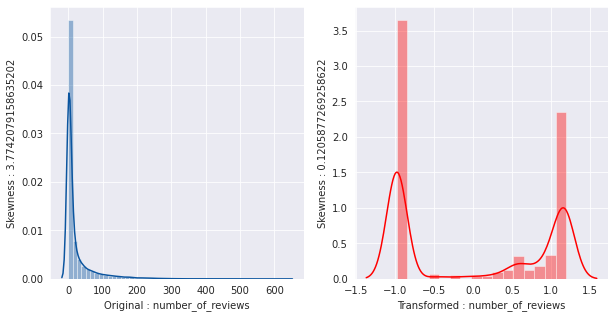

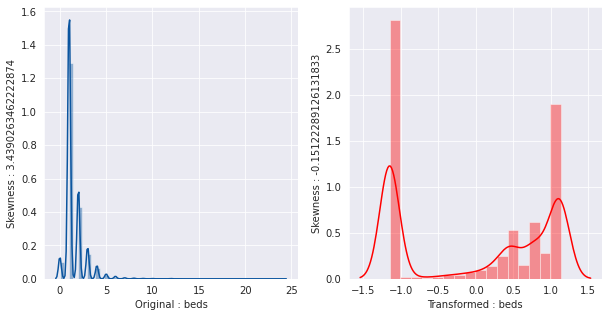

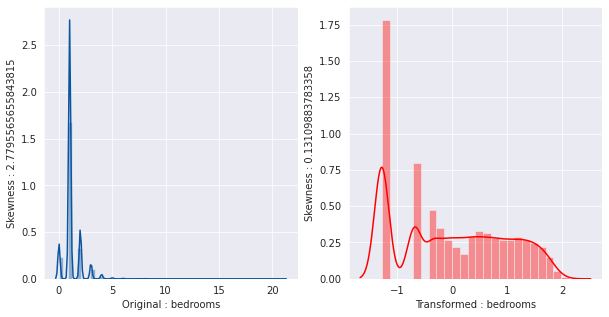

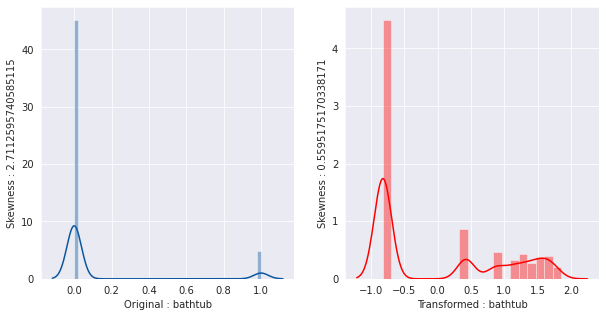

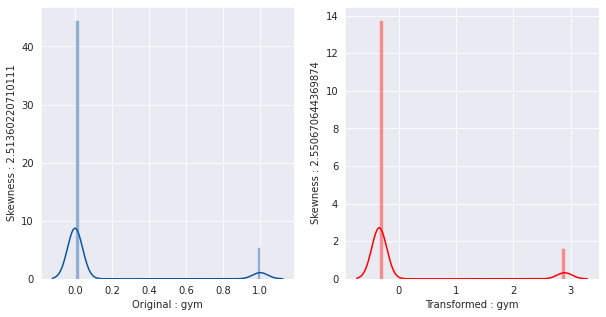

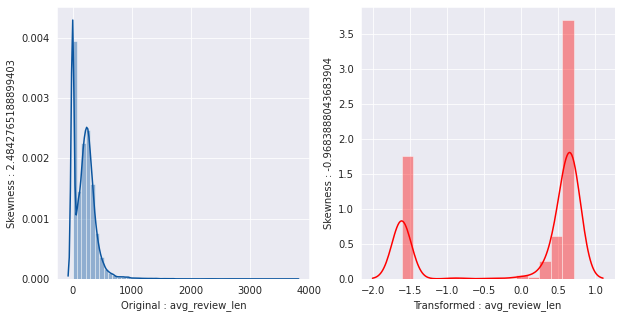

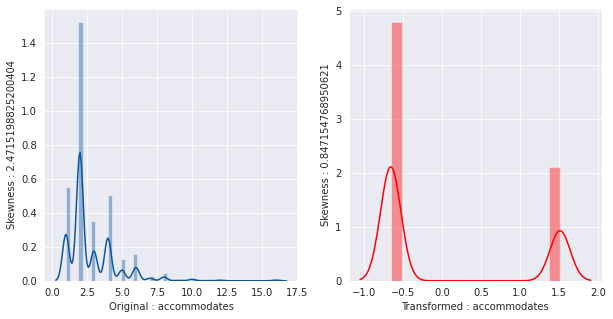

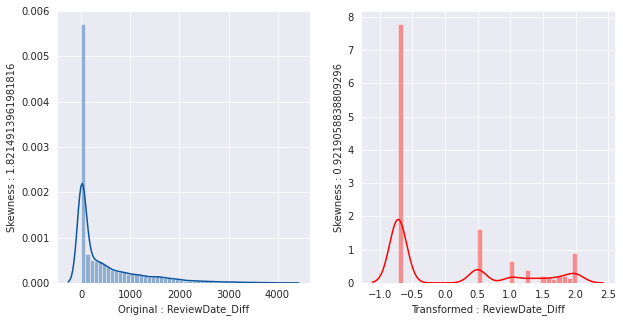

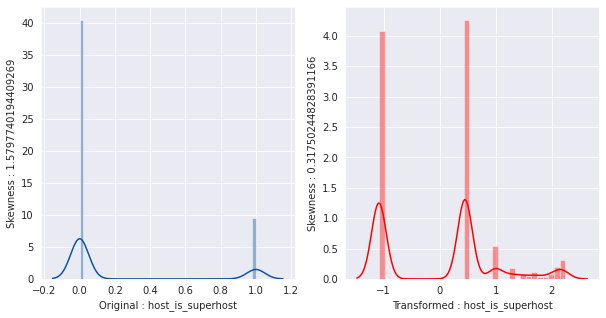

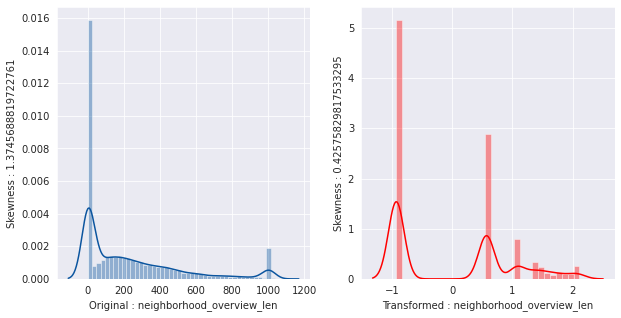

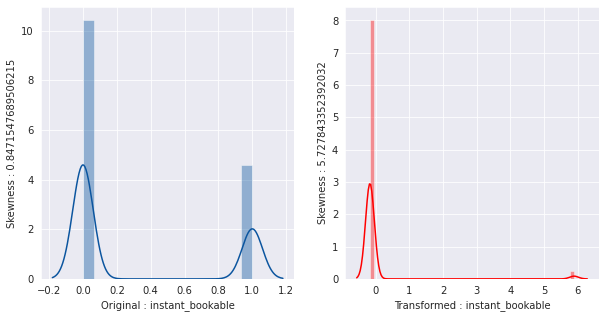

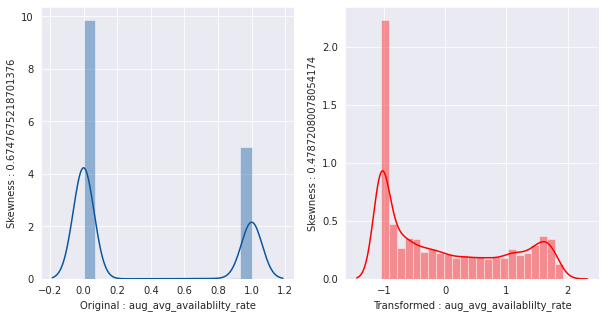

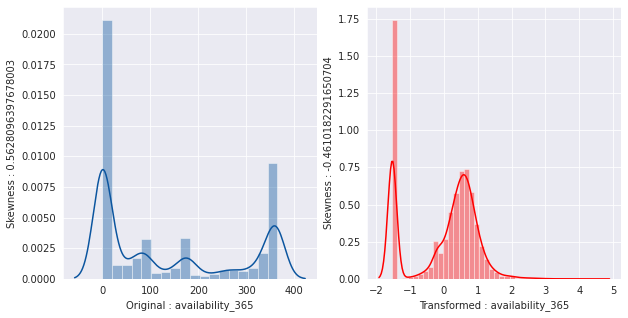

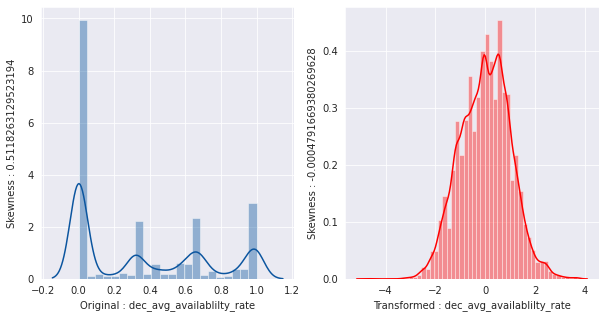

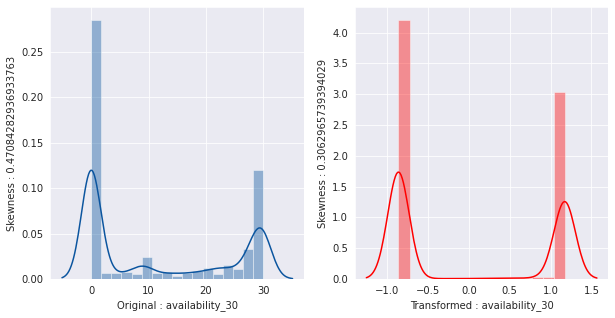

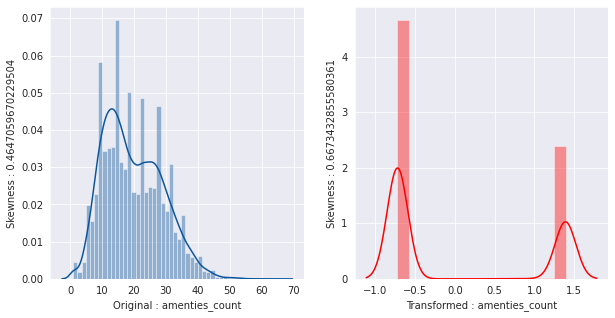

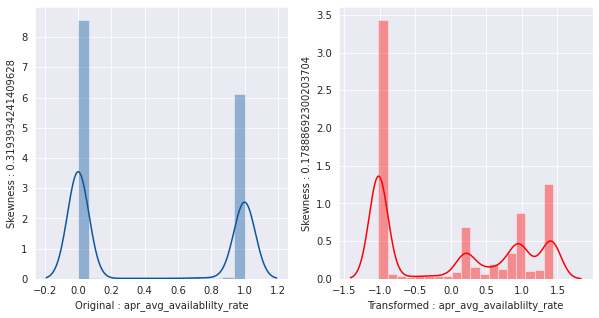

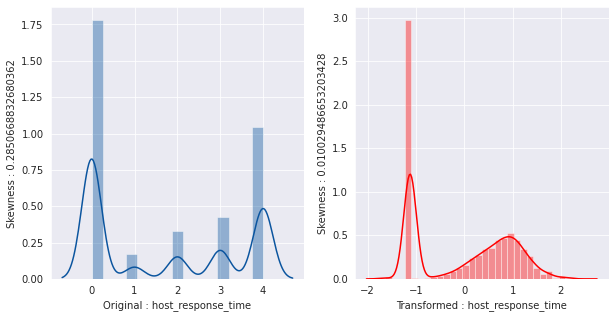

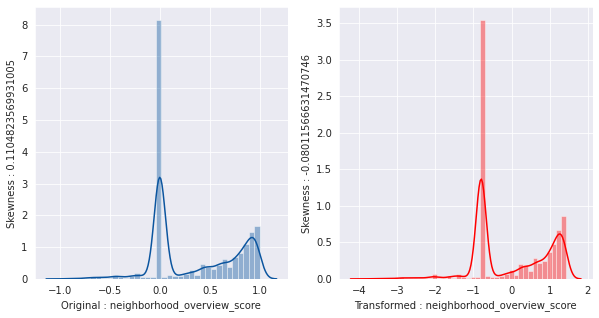

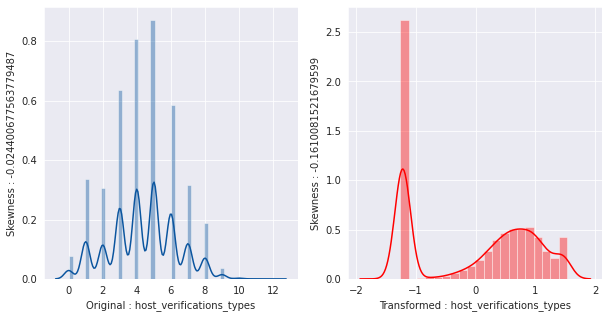

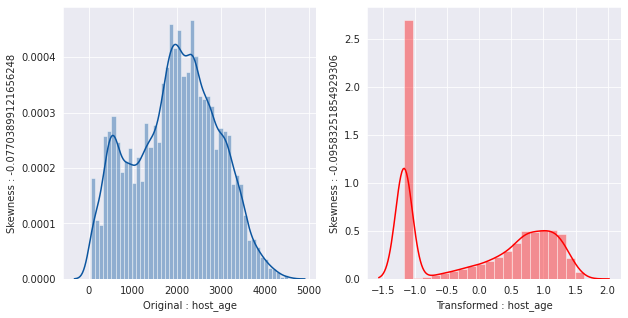

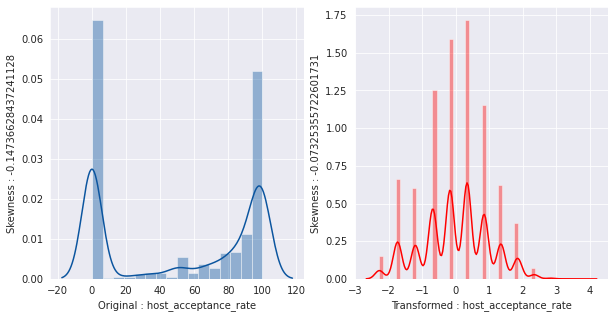

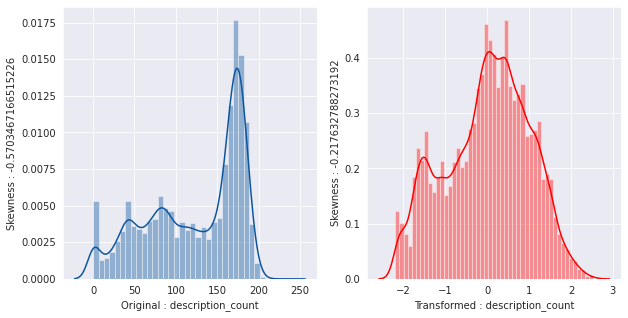

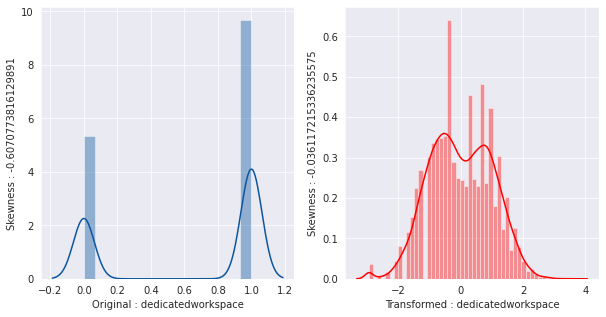

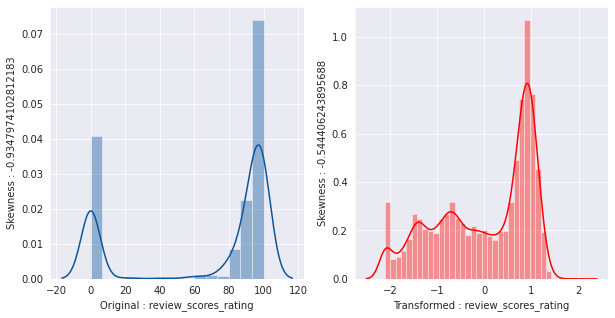

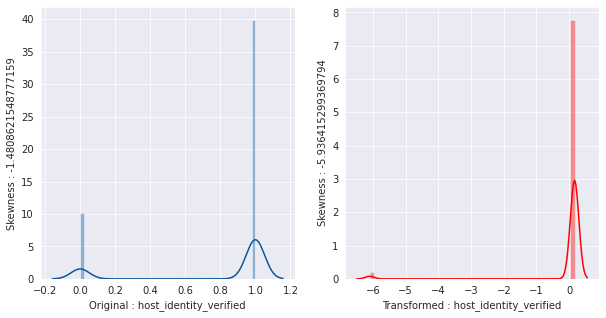

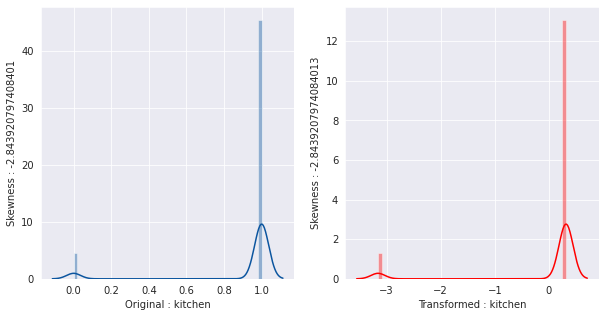

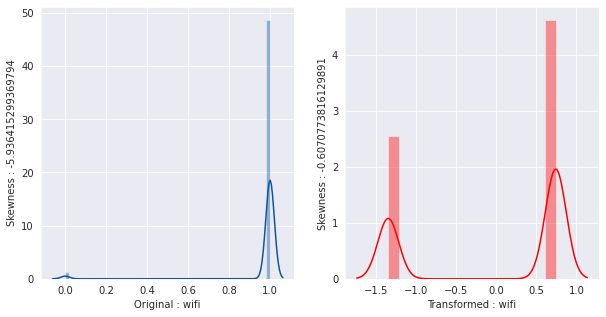

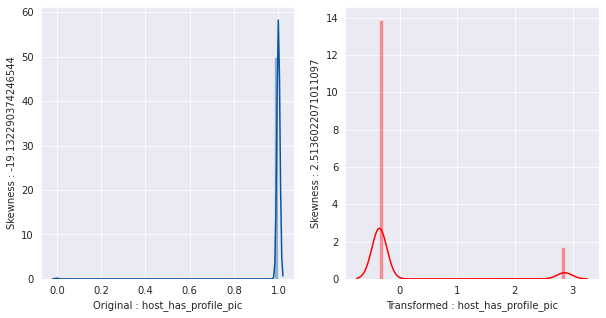

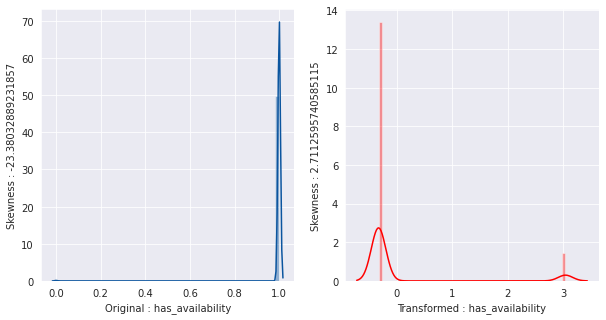

In [59]:
colIndex=0
for col in cols:
   # print("="*10)
   # print("Feature :- ", col)
    skew = X_train[col].skew()
   # print("Skewness:- ",skew)
   # print("="*10)
    sns.set_style("darkgrid")
    sns.set_palette("Blues_r")
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    ax1 = sns.distplot(X_train[col], ax=axes[0])
    ax1.set(xlabel='Original : ' + col )
    ax1.set(ylabel= 'Skewness : ' + str(skew))
    
    skew1 = df_p1[colIndex].skew()
    sns.set_palette("Paired")
    ax2 = sns.distplot(df_p1[colIndex], ax=axes[1], color = 'r')
    ax2.set(xlabel='Transformed : ' + col)
    ax2.set(ylabel= 'Skewness : ' + str(skew1))
    plt.show()
    colIndex=colIndex+1  

In [60]:
del df_p1

In [61]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=True)
power = power.fit(X_train)

In [62]:
X_train_p=power.transform(X_train)
X_test_p=power.transform(X_test)

In [63]:
X_train=pd.DataFrame(X_train_p,columns=X_train.columns,index=X_train.index)

In [64]:
X_train.shape

(25830, 46)

In [65]:
X_test=pd.DataFrame(X_test_p,columns=X_test.columns,index=X_test.index)

In [66]:
_DF_vector_train.shape

(25830, 549)

In [67]:
_DF_vector_test.shape

(11070, 549)

In [68]:
X_train_Final =X_train.merge(_DF_vector_train,left_index=True,right_index=True)

In [70]:
X_train_Final.shape

(25830, 595)

In [71]:
X_test_Final =X_test.merge(_DF_vector_test,left_index=True,right_index=True)

In [72]:
X_test_Final.shape

(11070, 595)

# Using Pretrained XGB For Feature Importance

In [76]:
from prettytable import PrettyTable
_Pretty_table_logs = PrettyTable()
_Pretty_table_logs.field_names = ["Model Name", "MAE", "MSE","RMSE","R2"]
def getPredictions(model,X_tr,y_tr,X_te,y_te,modelName=""):
    model.fit(X_tr,y_tr)
    predictions=model.predict(X_te)
    mae = metrics.mean_absolute_error(y_te, predictions)
    mse = metrics.mean_squared_error(y_te, predictions)
    rmse = np.sqrt(metrics.mean_squared_error(y_te, predictions))
    r2 = metrics.r2_score(y_te, predictions)

    #print('MAE (Mean Absolute Error): %s' %mae)
    #print('MSE (Mean Squared Error): %s' %mse)
    #print('RMSE (Root mean squared error): %s' %rmse)
    #print('R2 score: %s' %r2)
    if len(modelName) >0:
        _Pretty_table_logs.add_row([modelName, mae, mse,rmse,r2 ])
        pickle.dump(model, open(modelName, 'wb'))
        print (_Pretty_table_logs)
    return model,predictions

In [80]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
%matplotlib inline

In [81]:
xgb2=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, 
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=7,
             min_child_weight=4,
             n_estimators=500, n_jobs=-1, 
             objective='reg:squarederror', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=0.7, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [82]:
%%time
model_xgb2,predictions_xgb2= getPredictions(xgb2,X_train_Final,y_train,X_test_Final,y_test,"XGB")

+------------+--------------------+-------------------+-------------------+--------------------+
| Model Name |        MAE         |        MSE        |        RMSE       |         R2         |
+------------+--------------------+-------------------+-------------------+--------------------+
|    XGB     | 14.842574450230964 | 2881.952893192893 | 53.68382338463695 | 0.9479941244453606 |
+------------+--------------------+-------------------+-------------------+--------------------+
CPU times: user 7min 55s, sys: 2.1 s, total: 7min 57s
Wall time: 2min 23s


In [85]:
from matplotlib import pyplot

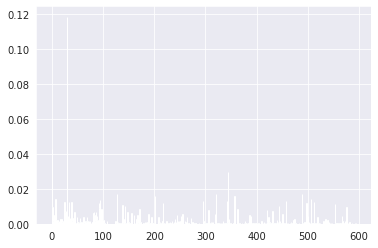

In [86]:

pyplot.bar(range(len(model_xgb2.feature_importances_)), model_xgb2.feature_importances_)
pyplot.show()

In [87]:
from xgboost import plot_importance

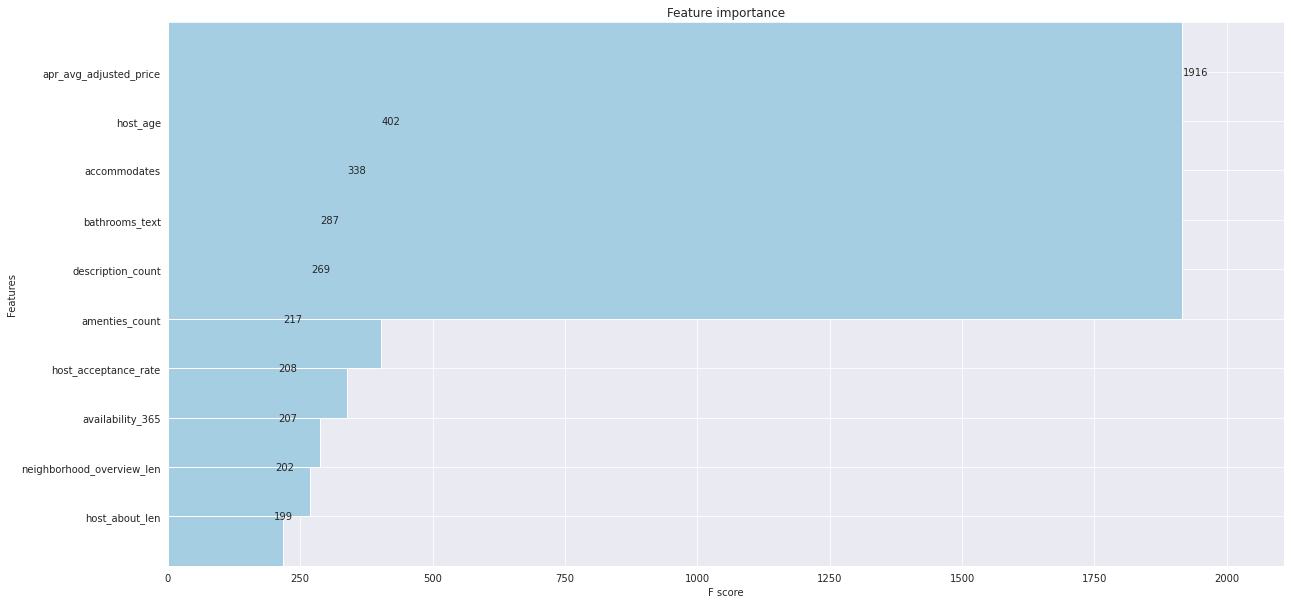

In [103]:
pyplot.rcParams["figure.figsize"] = (20,10)
plot_importance(model_xgb2,height=10,max_num_features=10,)
pyplot.show()

In [104]:
feature_important = model_xgb2.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)


<AxesSubplot:>

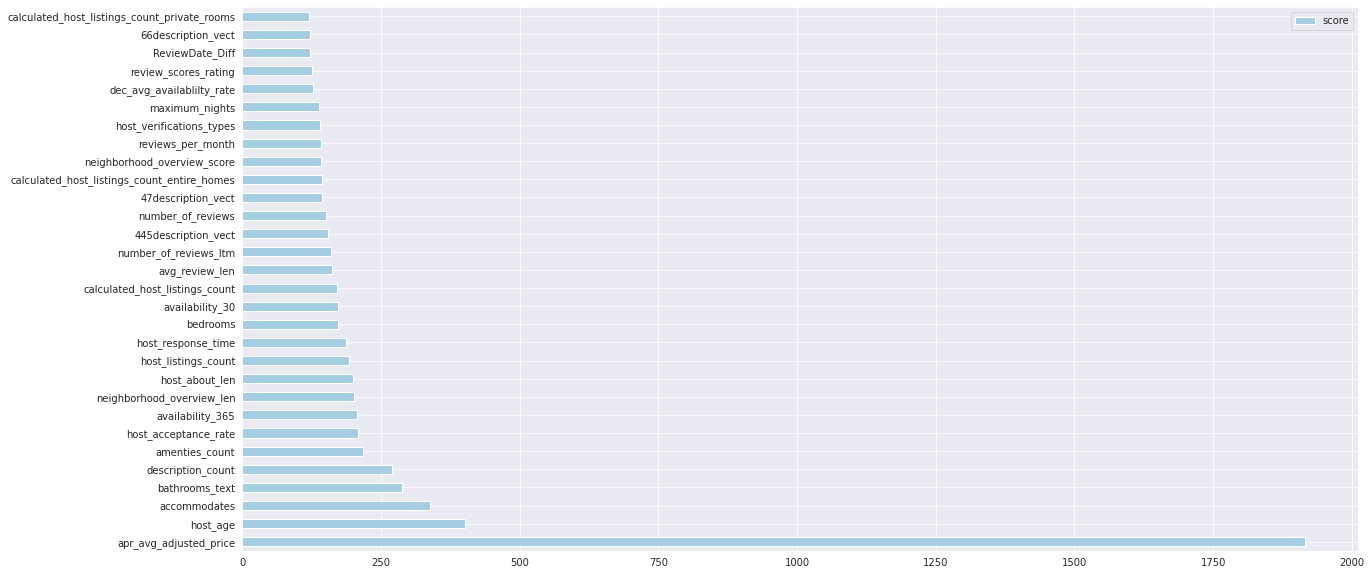

In [113]:

data.head(30).plot(kind='barh')

In [119]:
data.head(20).index.values()

TypeError: 'numpy.ndarray' object is not callable

In [116]:
Featured_Columns= data.head(10).index

In [117]:
Featured_Columns

Index(['apr_avg_adjusted_price', 'host_age', 'accommodates', 'bathrooms_text',
       'description_count', 'amenties_count', 'host_acceptance_rate',
       'availability_365', 'neighborhood_overview_len', 'host_about_len'],
      dtype='object')

In [115]:
X_train_f=X_train[feature_important]

KeyError: "['179description_vect', '22description_vect', '19neighbourhood_clean_vect', '352description_vect', '383description_vect', '237description_vect', '479description_vect', '18neighbourhood_clean_vect', '95description_vect', '19description_vect', '8neighbourhood_vect', '305description_vect', '173description_vect', '268description_vect', '418description_vect', '174description_vect', '363description_vect', '49description_vect', '299description_vect', '6neighbourhood_clean_vect', '240description_vect', '1neighbourhood_clean_vect', '468description_vect', '45description_vect', '73description_vect', '241description_vect', '158description_vect', '1property_vect', '13neighbourhood_vect', '486description_vect', '170description_vect', '72description_vect', '406description_vect', '217description_vect', '423description_vect', '39description_vect', '307description_vect', '463description_vect', '140description_vect', '315description_vect', '58description_vect', '60description_vect', '411description_vect', '280description_vect', '489description_vect', '87description_vect', '334description_vect', '484description_vect', '398description_vect', '417description_vect', '409description_vect', '336description_vect', '226description_vect', '353description_vect', '5description_vect', '118description_vect', '184description_vect', '287description_vect', '475description_vect', '4neighbourhood_clean_vect', '424description_vect', '106description_vect', '326description_vect', '216description_vect', '322description_vect', '101description_vect', '330description_vect', '242description_vect', '0neighbourhood_group_vect', '180description_vect', '149description_vect', '48description_vect', '9neighbourhood_vect', '310description_vect', '61description_vect', '472description_vect', '8neighbourhood_clean_vect', '9description_vect', '2neighbourhood_vect', '440description_vect', '2property_vect', '319description_vect', '339description_vect', '167description_vect', '360description_vect', '452description_vect', '165description_vect', '289description_vect', '451description_vect', '0room_type_vect', '366description_vect', '8description_vect', '86description_vect', '3property_vect', '221description_vect', '428description_vect', '405description_vect', '130description_vect', '477description_vect', '340description_vect', '4description_vect', '393description_vect', '342description_vect', '123description_vect', '32description_vect', '12neighbourhood_vect', '404description_vect', '298description_vect', '166description_vect', '70description_vect', '228description_vect', '205description_vect', '400description_vect', '328description_vect', '250description_vect', '327description_vect', '351description_vect', '120description_vect', '312description_vect', '35description_vect', '154description_vect', '148description_vect', '492description_vect', '373description_vect', '88description_vect', '224description_vect', '419description_vect', '11neighbourhood_vect', '160description_vect', '84description_vect', '446description_vect', '53description_vect', '245description_vect', '448description_vect', '103description_vect', '483description_vect', '420description_vect', '159description_vect', '249description_vect', '96description_vect', '378description_vect', '190description_vect', '78description_vect', '65description_vect', '246description_vect', '138description_vect', '333description_vect', '47description_vect', '445description_vect', '122description_vect', '291description_vect', '407description_vect', '5neighbourhood_vect', '337description_vect', '372description_vect', '403description_vect', '359description_vect', '201description_vect', '71description_vect', '16neighbourhood_clean_vect', '151description_vect', '17neighbourhood_clean_vect', '288description_vect', '46description_vect', '62description_vect', '309description_vect', '283description_vect', '478description_vect', '493description_vect', '121description_vect', '44description_vect', '102description_vect', '67description_vect', '247description_vect', '200description_vect', '220description_vect', '303description_vect', '348description_vect', '376description_vect', '81description_vect', '59description_vect', '4property_vect', '13description_vect', '192description_vect', '481description_vect', '146description_vect', '394description_vect', '344description_vect', '193description_vect', '218description_vect', '251description_vect', '76description_vect', '349description_vect', '272description_vect', '147description_vect', '80description_vect', '117description_vect', '100description_vect', '187description_vect', '488description_vect', '168description_vect', '3neighbourhood_vect', '295description_vect', '316description_vect', '323description_vect', '388description_vect', '422description_vect', '389description_vect', '248description_vect', '3neighbourhood_clean_vect', '7neighbourhood_vect', '134description_vect', '476description_vect', '131description_vect', '113description_vect', '30description_vect', '124description_vect', '1room_type_vect', '454description_vect', '395description_vect', '112description_vect', '284description_vect', '191description_vect', '361description_vect', '0property_vect', '269description_vect', '4neighbourhood_vect', '6property_vect', '207description_vect', '391description_vect', '74description_vect', '338description_vect', '7description_vect', '321description_vect', '14neighbourhood_clean_vect', '34description_vect', '129description_vect', '144description_vect', '66description_vect', '236description_vect', '156description_vect', '83description_vect', '377description_vect', '97description_vect', '470description_vect', '225description_vect', '7neighbourhood_clean_vect', '10description_vect', '439description_vect', '10neighbourhood_clean_vect', '212description_vect', '9property_vect', '370description_vect', '304description_vect', '42description_vect', '177description_vect', '227description_vect', '77description_vect', '347description_vect', '9neighbourhood_clean_vect', '155description_vect', '381description_vect', '142description_vect', '414description_vect', '494description_vect', '447description_vect', '345description_vect', '2description_vect', '325description_vect', '169description_vect', '244description_vect', '12neighbourhood_clean_vect', '139description_vect', '231description_vect', '279description_vect', '467description_vect', '380description_vect', '473description_vect', '362description_vect', '82description_vect', '499description_vect', '133description_vect', '415description_vect', '2neighbourhood_clean_vect', '464description_vect', '199description_vect', '105description_vect', '356description_vect', '239description_vect', '6description_vect', '278description_vect', '17description_vect', '18description_vect', '282description_vect', '31description_vect', '126description_vect', '435description_vect', '203description_vect', '89description_vect', '152description_vect', '441description_vect', '469description_vect', '413description_vect', '450description_vect', '429description_vect', '487description_vect', '496description_vect', '318description_vect', '114description_vect', '497description_vect', '1neighbourhood_group_vect', '341description_vect', '188description_vect', '135description_vect', '399description_vect', '211description_vect', '320description_vect', '150description_vect', '364description_vect', '254description_vect', '10neighbourhood_vect', '458description_vect', '461description_vect', '412description_vect', '157description_vect', '357description_vect', '264description_vect', '7property_vect', '51description_vect', '104description_vect', '115description_vect', '172description_vect', '116description_vect', '396description_vect', '262description_vect', '36description_vect', '6neighbourhood_vect', '94description_vect', '355description_vect', '55description_vect', '215description_vect', '92description_vect', '128description_vect', '229description_vect', '433description_vect', '276description_vect', '57description_vect', '186description_vect', '402description_vect', '209description_vect', '161description_vect', '297description_vect', '459description_vect', '286description_vect', '178description_vect', '426description_vect', '183description_vect', '29description_vect', '444description_vect', '5property_vect', '260description_vect', '294description_vect', '267description_vect', '234description_vect', '20description_vect', '379description_vect', '332description_vect', '68description_vect', '243description_vect', '43description_vect', '453description_vect', '436description_vect', '449description_vect', '136description_vect', '258description_vect', '5neighbourhood_clean_vect'] not in index"